In [1]:
import pyAMARES

/home/xujia/miniconda3/envs/mrs/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


# Fitting MRS with unknown species, using HSVDinitializer
**[Try this tutorial on Google Colab!](https://colab.research.google.com/drive/15zKm0rqnVheYwk-5D2orwNalTDu5a6zg)**

- First, simulate a spectrum with two peaks

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 #  An example of singlet,,



/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:314: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pk = pk.applymap(
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:315: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  lambda x: pd.to_numeric(x, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:86: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")
/home/xujia/gitlab/pyAMARES/pyAMARES/kernel/PriorKnowledge.py:174: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '314.1592653589793' has dtype incompatible with int64, please explicitly cast to a comp

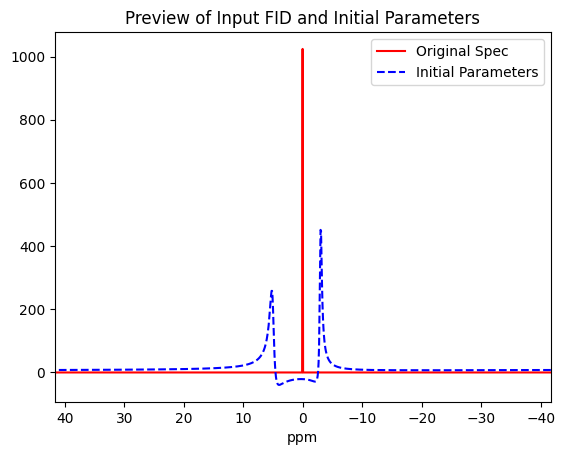

Printing the Prior Knowledge File singlet.csv


,Peak_A,Peak_B
Index,,
Initial Values,NaN,NaN
amplitude,10,8
chemicalshift,5,-3
linewidth,100,50
phase,0,0
g,0,0
Bounds,NaN,NaN
amplitude,"(0,","(0,"
chemicalshift,NaN,NaN


In [3]:
priorknowledge = pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='singlet.csv',
                                preview=True) 

- **Simulate an MRS Spectra Using Scanner Parameters**:
    - **MHz (Field Strength)**: 300 MHz. 
    - **sw (Spectral Width)**: 5000.0 Hz.
    - **Deadtime**: 100 microseconds (100e-6 seconds).
    - **Number of Points (fid_len)**: 1024
    - **SNR (Signal to Noise Ratio, snr_target)**: 40.

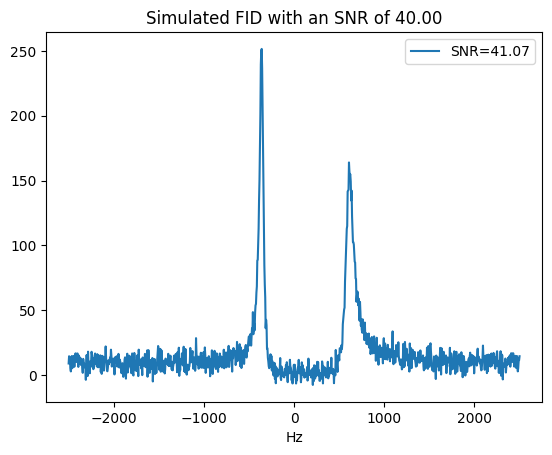

In [4]:
fid = pyAMARES.kernel.fid.simulate_fid(priorknowledge.initialParams, 
                                       MHz=300.0, 
                                       sw=5000.0, 
                                       deadtime=100e-6, 
                                       fid_len=1024, 
                                       snr_target=40 , 
                                       preview=True)

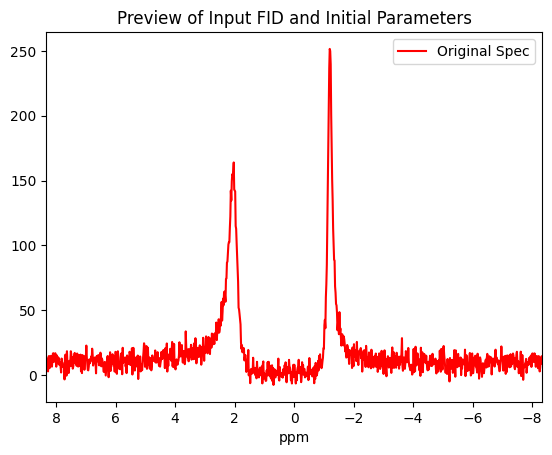

In [5]:
FIDobj =  pyAMARES.initialize_FID(fid=fid,
                                  MHz=300.0, 
                                  sw=5000.0, 
                                  deadtime=100e-6,
                                  priorknowledgefile=None,
                                  preview=True, 
                                 normalize_fid=False) 

Norm of residual = 53.147
Norm of the data = 1899.763
resNormSq / dataNormSq = 0.028


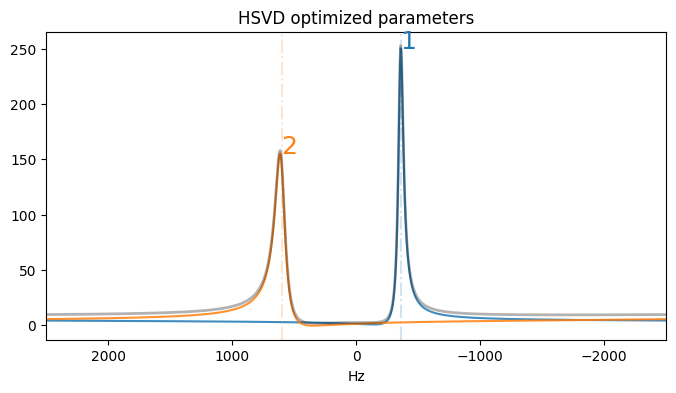

In [6]:
params_hsvd = pyAMARES.HSVDinitializer(fid_parameters=FIDobj, 
                                      num_of_component=2, 
                                      fitting_parameters=None, 
                                       preview=True)

In [7]:
params_hsvd

name,value,initial value,min,max,vary
ak_1,8.06104089,8.061040887737185,-inf,inf,True
freq_1,-359.886870,-359.88686951813514,-inf,inf,True
dk_1,158.303590,158.30359011479499,0.00000000,inf,True
phi_1,-0.00436218,-0.004362175750573314,-3.14159265,3.14159265,True
g_1,0.00000000,0.0,-1.00000000,1.00000000,False
ak_2,10.0798656,10.079865574173914,-inf,inf,True
freq_2,601.063510,601.0635097984616,-inf,inf,True
dk_2,313.292179,313.29217921706584,0.00000000,inf,True
phi_2,-0.00888191,-0.008881909015565903,-3.14159265,3.14159265,True
g_2,0.00000000,0.0,-1.00000000,1.00000000,False


A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 4.119e-06
Fitting with method=least_squares took 0.02272 seconds


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:199: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn(


Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
It seems that zeros are padded after 1024
Remove padded zeros from residual estimation!
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, simple_df is set to None
There is no result_sum generated, probably there is only 1 peak
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 18
Reduced chi-squared (redchi): 0.026052184768063997
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 53.146
Norm of the data = 1899.763
resNormSq / dataNormSq = 0.028


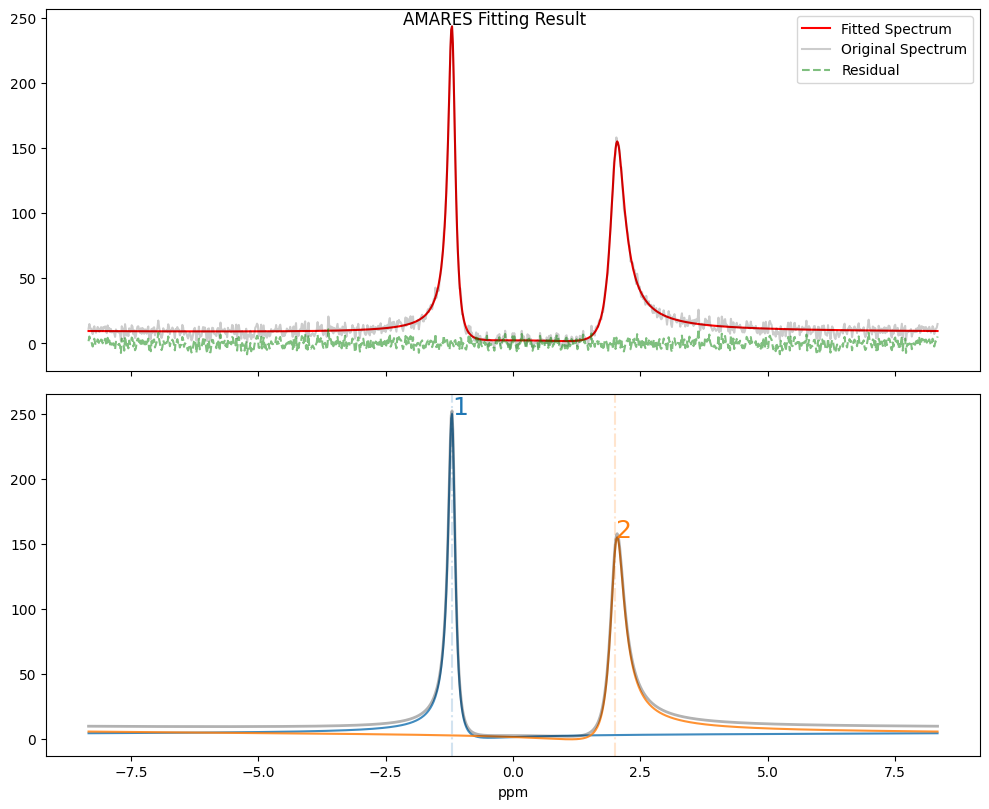

In [8]:
FIDresult = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=params_hsvd, 
                               method='least_squares', 
                               ifplot=True,
                               inplace=False)

In [9]:
FIDresult.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
1,8.062,0.058,1.255,-1.200,0.001,0.100,50.402,0.511,223.687,-0.227,0.413,258.829,0.000,0.000,inf,36.419
2,10.079,0.082,1.415,2.004,0.002,0.134,99.706,1.138,501.616,-0.510,0.466,129.387,0.000,0.000,inf,45.529


In [10]:
FIDobj.ppm

array([-8.33333333, -8.31704138, -8.30074943, ...,  8.30074943,
        8.31704138,  8.33333333])

# Frequency-Selective AMARES

## Method 1: frequency-selective AMARES using MPFIR filter 
   - References: 
       1. Vanhamme et al, J Mag Reson 143, 1-16(2000)
       2. Sundin et al, J Mag Reson 139, 189-204 (1999)

In [11]:
from pyAMARES import filter_fid_by_ppm, filter_param_by_ppm

In [12]:
fit_ppm = (-.5, 8.2) #ppm

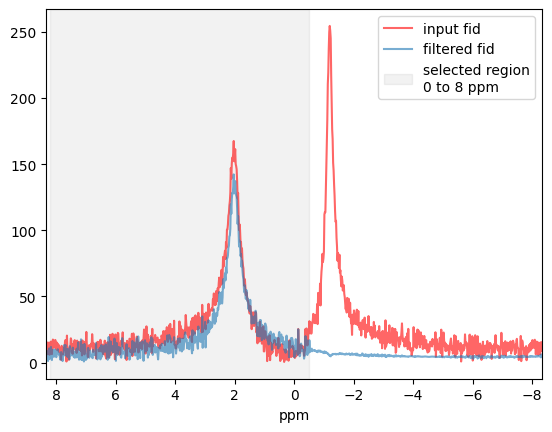

In [13]:
FIDobj2 = pyAMARES.filter_fid_by_ppm(FIDobj, fit_ppm=fit_ppm, ifplot=True)

In [14]:
param2 = filter_param_by_ppm(params_hsvd, fit_ppm=fit_ppm, MHz=FIDobj2.MHz)

fit_Hz=[-150. 2460.]
Check if the expr for all parameters is restricted to a parameter that has already been filtered out.


A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 2.449e-06
Fitting with method=least_squares took 0.023917 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
The amplitude of index [0]  is negative! Make it positive and flip the phase!
It seems that zeros are padded after 954
Remove padded zeros from residual estimation!
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, simple_df is set to None
There is no result_sum generated, probably there is only 1 peak
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 40
Reduced chi-squared (redchi): 0.011377302013123737
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 23.255
Norm of the data = 589.592
resNormSq / dataNormSq = 0.039


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:199: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn(


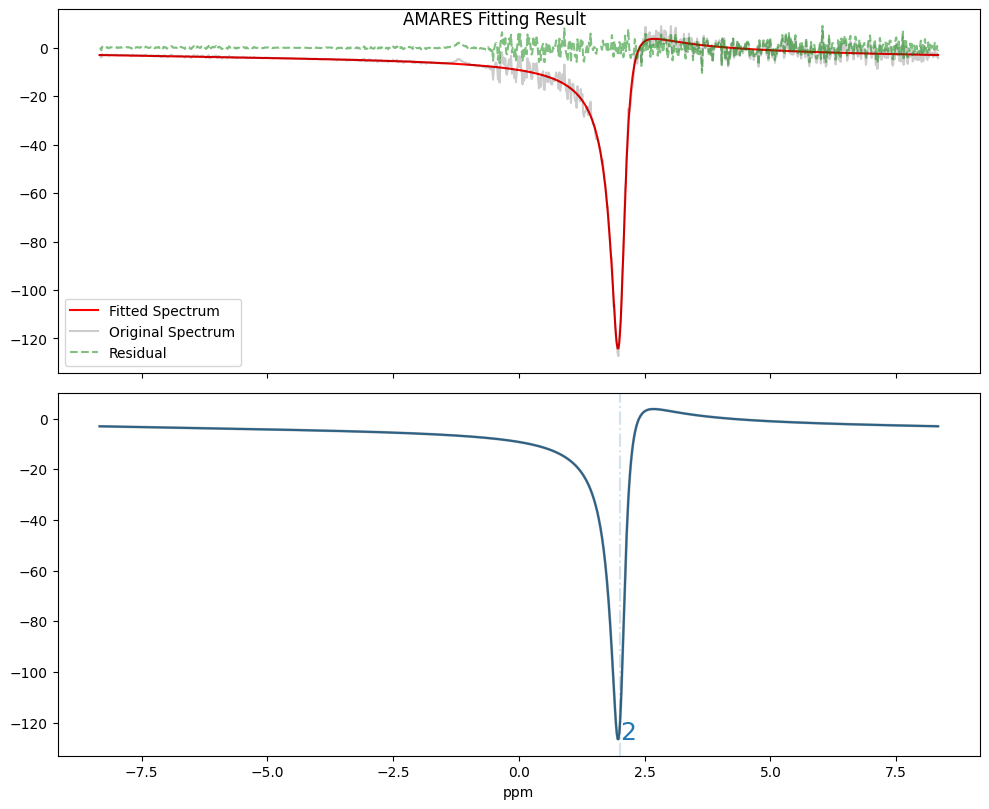

In [15]:
FID_result_positive_ppm_peak = pyAMARES.fitAMARES(fid_parameters=FIDobj2, # Filtered FID object
                               fitting_parameters=param2, 
                               method='least_squares', 
                               ifplot=True,
                               inplace=False)

In [16]:
FID_result_positive_ppm_peak.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
2,8.407,0.053,0.819,2.003,0.001,0.078,99.222,0.890,292.474,130.523,0.363,0.773,0.000,0.000,inf,57.781


## Method 2: Frequency-Selective AMARES using Objective Function with frequency range

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 4.119e-06
Fitting range -0.4969045291625935 ppm to 8.202997719126751 ppm!
Fitting with method=least_squares took 0.023244 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
It seems that zeros are padded after 1024
Remove padded zeros from residual estimation!
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, simple_df is set to None
There is no result_sum generated, probably there is only 1 peak
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 20
Reduced chi-squared (redchi): 62.35271050238577
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 1070.276
Norm of the data = 1899.763
resNormSq / dataNormSq = 0.563


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:199: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn(


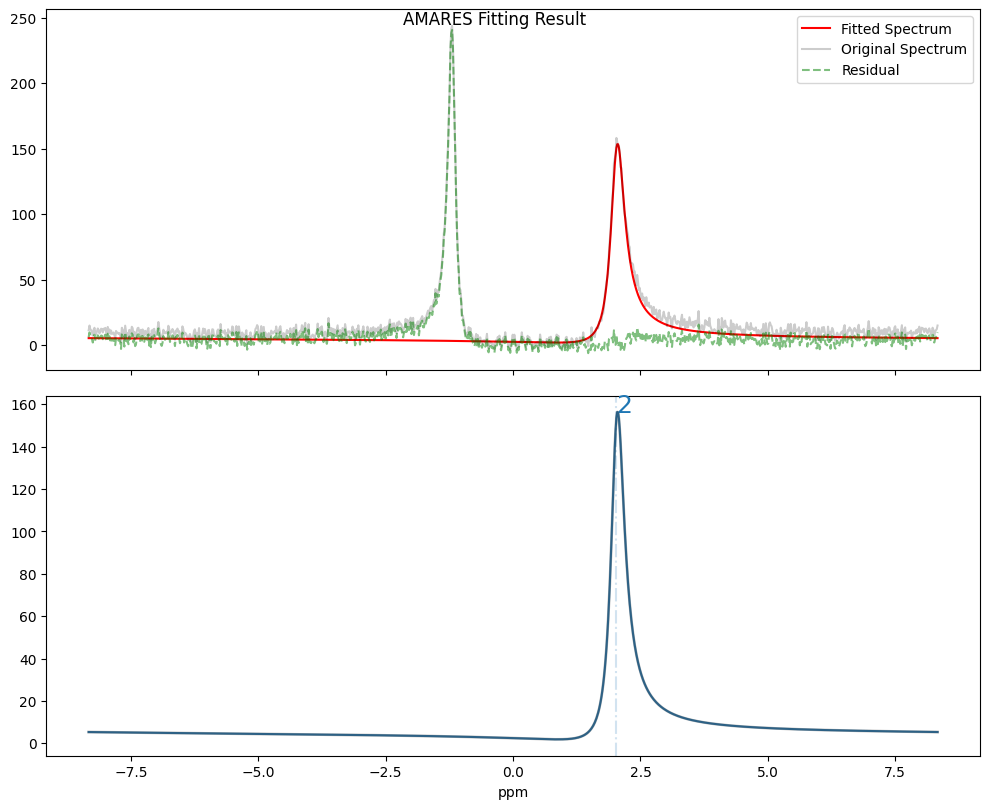

In [17]:
FID_result_positive_ppm_peak2 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=param2,
                               fit_range=fit_ppm,  # Instead of filtering out the spectrum,  (-.5, 8.2) ppm
                                                   # is passed to the objective_func  
                               objective_func=pyAMARES.objective_range, # This objective_range can accept the `fit_range` argument
                               method='least_squares',             
                               ifplot=True,
                               inplace=False)

In [18]:
FID_result_positive_ppm_peak2.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
2,9.851,0.126,4.531,2.019,0.003,0.423,98.100,1.748,1600.050,-6.051,0.731,34.979,0.000,0.000,inf,44.501
